# An exploratory data analysis

## Connection to MongoDB 

In [1]:
import pymongo
from pymongo import MongoClient
import time
Client = MongoClient("mongodb://nbi-mongo.admin/")
db = Client.bridge
collection = db["SampleNbi2"]

## Bridge Records in Database

In [2]:
startTime = time.time()
print("Bridges Records in DB: ", collection.count())
print("Seconds : ", (time.time() - startTime))

Bridges Records in DB:  17509885
Seconds :  0.008536100387573242


## Total Number of Bridges (Years)

In [3]:
import pandas as pd

listStates = []
startTime = time.time()
for i in collection.distinct("stateCode"):
    listStates.append(i)
print("Time to create list of distinct states in Seconds: ", (time.time() - startTime))

countPerYear = {}
startTime = time.time()
for i in collection.distinct("year"):
    countPerYear[i] =  collection.find({"year":i}).count()
print("Seconds: ",(time.time()- startTime))
count_per_year = pd.DataFrame(list(countPerYear.items()), columns = ['year', 'Distinct count of Bridges'])
count_per_year.set_index("year", inplace = True)
count_per_year

Time to create list of distinct states in Seconds:  0.014206171035766602
Seconds:  5.496885061264038


,Distinct count of Bridges
year,
1992,707509
1993,700993
1994,703606
1995,713410
1996,711792
1997,715853
1998,716703
1999,721247
2000,724037


## Trend of the count of records in the bridge

Trend of the count of records in the bridge:


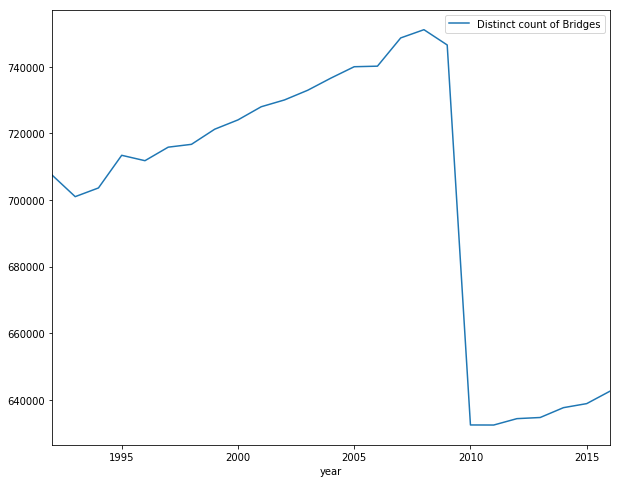

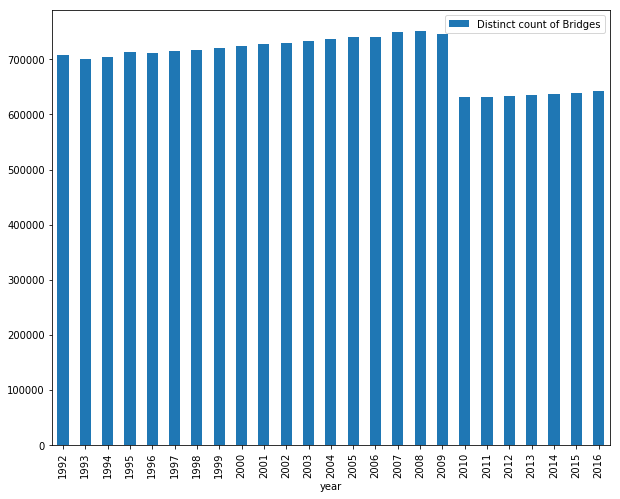

In [4]:
%matplotlib inline
print("Trend of the count of records in the bridge:")
count_per_year.plot(figsize=(10,8))
count_per_year.plot(kind = "bar", figsize=(10,8))

## States with most  bridges

In [5]:
countPerState = {}
startTime = time.time()
for i in listStates:
    countPerState[i] = collection.find({"year":2016, "stateCode":i}).count()
print("Seconds: ", (time.time() - startTime))
count_per_state = pd.DataFrame(list(countPerState.items()), columns = ['State Code', 'Count of Records'])
#count_per_state = count_per_state.set_index('State Code')

Seconds:  36.40173649787903


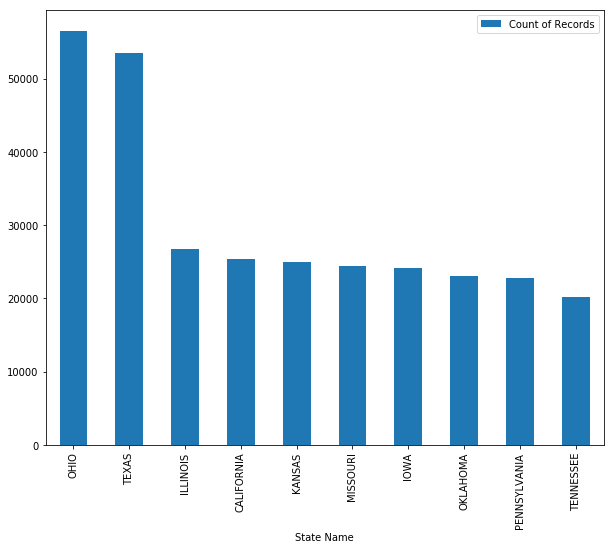

In [7]:
stateName = {'25':'MASSACHUSETTS',
             '04':'ARIZONA', 
             '08':'COLORADO',
             '38':'NORTH DAKOTA', 
             '09':'CONNECTICUT', 
             '19':'IOWA', 
             '26':'MICHIGAN', 
             '48':'TEXAS',
             '35':'NEW MEXICO',
             '17':'ILLINOIS', 
             '51':'VIRGINIA',
             '23':'MAINE',
             '16':'IDAHO',
             '36':'NEW YORK',
             '56':'WYOMING',
             '29':'MISSOURI',
             '39':'OHIO',
             '28':'MISSISSIPI', 
             '11':'DISTRICT OF COLOMBIA',
             '21':'KENTUCKY', 
             '18':'INDIANA',
             '06':'CALIFORNIA',
             '47':'TENNESSEE', 
             '12':'FLORIDA',
             '24':'MARYLAND',
             '34':'NEW JERSEY', 
             '46':'SOUTH DAKOTA',
             '13':'GEORGIA',
             '55':'WISCONSIN',
             '30':'MONTANA',
             '54':'WEST VIGINIA',
             '15':'HAWAII', 
             '32':'NEVADA', 
             '37':'NORTH CAROLINA',
             '10':'DELAWARE', 
             '33':'NEW HAMPSHIRE', 
             '44':'RHODE ISLAND',
             '50':'VERMONT', 
             '42':'PENNSYLVANIA', 
             '05':'ARKANSAS', 
             '20':'KANSAS', 
             '45':'SOUTH CAROLINA',
             '22':'LOUISIANA',
             '40':'OKLAHOMA', 
             '72':'PUERTO RICO', 
             '41':'OREGON',
             '21':'MINNESOTA', 
             '53':'WASHINGTON', 
             '01':'ALABAMA', 
             '31':'NEBRASKA',
             '02':'ALASKA', 
             '49':'UTAH'
               }

count_per_state['State Name'] =  count_per_state['State Code'].map(stateName)
count_per_state = count_per_state.set_index('State Name')
asc_c=count_per_state.sort_values(['Count of Records'],ascending = 0)
asc_c.head(n=10).sort_values(['Count of Records'], ascending = 0).plot(kind = 'bar', figsize=(10,8))

## States with least bridges

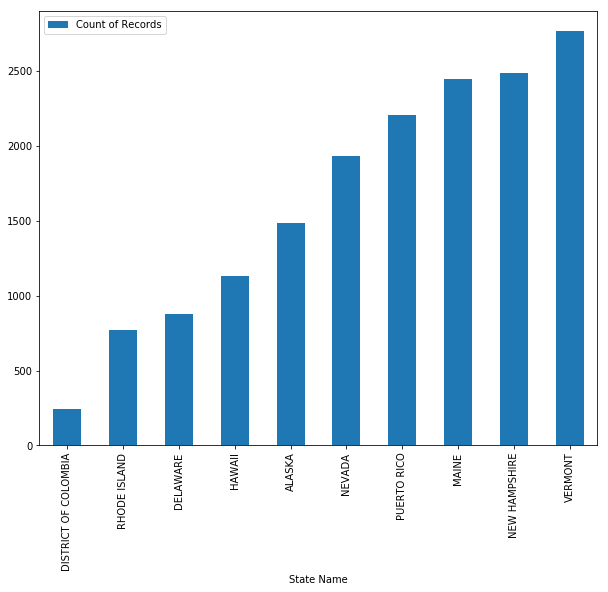

In [8]:
asc_c.tail(n=10).sort_values(['Count of Records'], ascending = 1).plot(kind = 'bar', figsize=(10,8))

## Year Built

In [9]:
pipeline = [{"$match":{"year":2016}},
            {'$group':{"_id":"$yearBuilt", "count":{"$sum":1}}}]
startTime = time.time()
yearBuiltResult = collection.aggregate(pipeline)
print("Seconds: ",(time.time() - startTime))
yearBuiltResult_df = pd.DataFrame(list(yearBuiltResult))

Seconds:  1.5601255893707275


## Early bridges

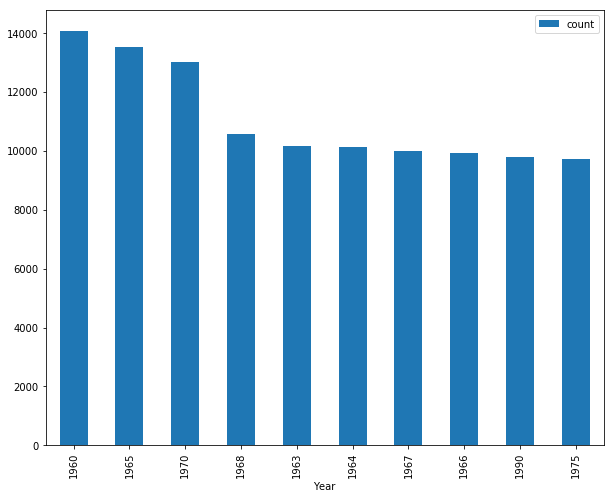

In [10]:
yearBuiltResult_df = yearBuiltResult_df.rename(columns = {'_id': 'Year'})
sort_yearBuiltResult_df=yearBuiltResult_df.sort_values('count', ascending = 0)
sort_yearBuiltResult_df.set_index('Year').head(n=10).plot(kind = 'bar', figsize=(10,8))


## Recently built bridges

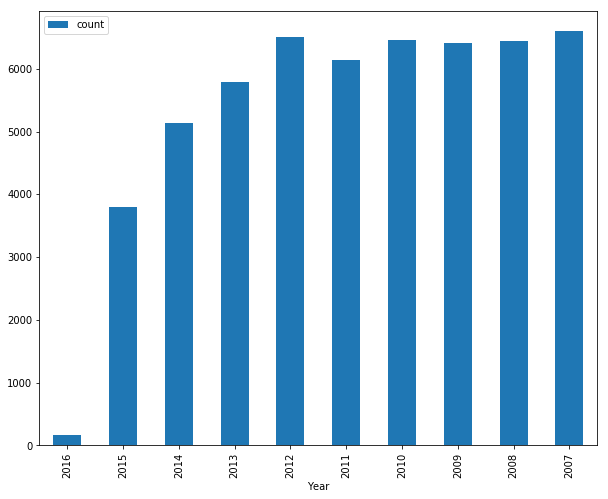

In [11]:
sort_yearBuiltResult_rdf=yearBuiltResult_df.sort_values('Year', ascending = 0)
sort_yearBuiltResult_rdf.set_index('Year').head(n=10).plot(kind = "bar", figsize = (10,8))


## Summary of NBI data

In [12]:

pipeline = [{"$match": {"year":2016}},
            {"$project":{"_id":0, "stateCode":1,"deckWidthOutToOut":1, "structureLength":1, "averageDailyTraffic":1 }}]
startTime = time.time()
pdc = collection.aggregate(pipeline)
print("Seconds : ", (time.time() - startTime))
nbi = pd.DataFrame(list(pdc))


Seconds :  0.07834887504577637


In [13]:
stateName = {'25':'MASSACHUSETTS',
             '04':'ARIZONA', 
             '08':'COLORADO',
             '38':'NORTH DAKOTA', 
             '09':'CONNECTICUT', 
             '19':'IOWA', 
             '26':'MICHIGAN', 
             '48':'TEXAS',
             '35':'NEW MEXICO',
             '17':'ILLINOIS', 
             '51':'VIRGINIA',
             '23':'MAINE',
             '16':'IDAHO',
             '36':'NEW YORK',
             '56':'WYOMING',
             '29':'MISSOURI',
             '39':'OHIO',
             '28':'MISSISSIPI', 
             '11':'DISTRICT OF COLOMBIA',
             '21':'KENTUCKY', 
             '18':'INDIANA',
             '06':'CALIFORNIA',
             '47':'TENNESSEE', 
             '12':'FLORIDA',
             '24':'MARYLAND',
             '34':'NEW JERSEY', 
             '46':'SOUTH DAKOTA',
             '13':'GEORGIA',
             '55':'WISCONSIN',
             '30':'MONTANA',
             '54':'WEST VIGINIA',
             '15':'HAWAII', 
             '32':'NEVADA', 
             '37':'NORTH CAROLINA',
             '10':'DELAWARE', 
             '33':'NEW HAMPSHIRE', 
             '44':'RHODE ISLAND',
             '50':'VERMONT', 
             '42':'PENNSYLVANIA', 
             '05':'ARKANSAS', 
             '20':'KANSAS', 
             '45':'SOUTH CAROLINA',
             '22':'LOUISIANA',
             '40':'OKLAHOMA', 
             '72':'PUERTO RICO', 
             '41':'OREGON',
             '21':'MINNESOTA', 
             '53':'WASHINGTON', 
             '01':'ALABAMA', 
             '31':'NEBRASKA',
             '02':'ALASKA', 
             '49':'UTAH'
               }

nbi['State Name'] =  nbi['stateCode'].map(stateName)

In [14]:
nbi['deckArea']= nbi['deckWidthOutToOut'] * nbi['structureLength']
nbi_summary = nbi[['State Name','deckWidthOutToOut','structureLength','deckArea','averageDailyTraffic']]
nbi_summary = nbi_summary.groupby(['State Name']).agg({'State Name':'count',
                                'deckArea':'sum',
                                'averageDailyTraffic':'sum'})
nbi_summary = nbi_summary.rename(columns={'State Name': 'Count', 'deckArea':'Sum of Deck Area','averageDailyTraffic':
                                         'Sum of ADT'})

In [15]:
nbi_summary

,Count,Sum of Deck Area,Sum of ADT
State Name,,,
ALABAMA,16098,9238040.53,76613580
ALASKA,1488,710703.90,3357512
ARIZONA,8154,5055845.20,97256999
ARKANSAS,12871,6381829.40,49636105
CALIFORNIA,25431,29478067.98,667205896
COLORADO,8680,4926475.88,68595652
CONNECTICUT,4214,3265916.52,78275293
DELAWARE,877,978596.38,11361551
DISTRICT OF COLOMBIA,245,568827.33,7660611


## Bridge Counts across states

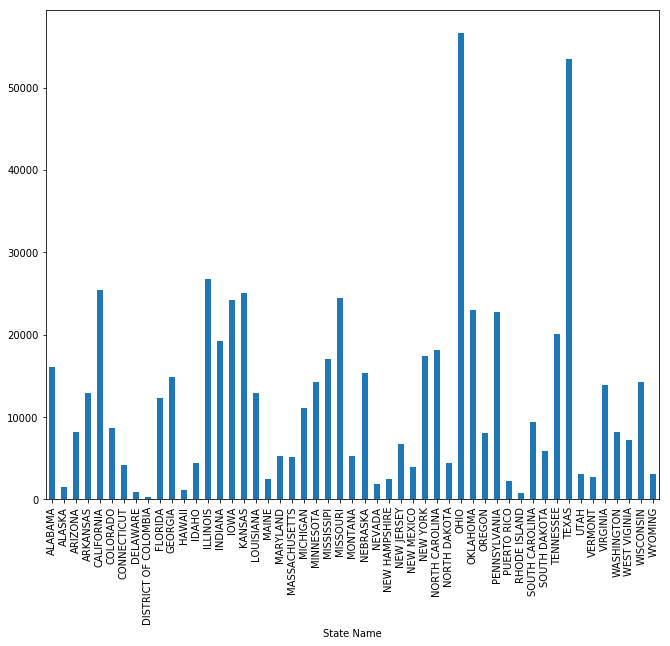

In [16]:
nbi_summary['Count'].plot(kind = 'bar', figsize = (11,9))

## Deck Area Summary across states


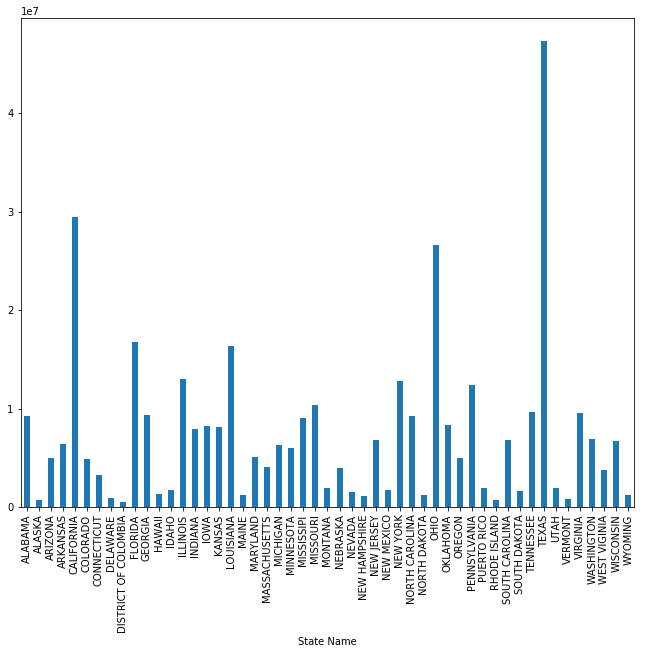

In [17]:
nbi_summary['Sum of Deck Area'].plot(kind = 'bar', figsize = (11,9))

## Summary of Average Daily Traffic across states


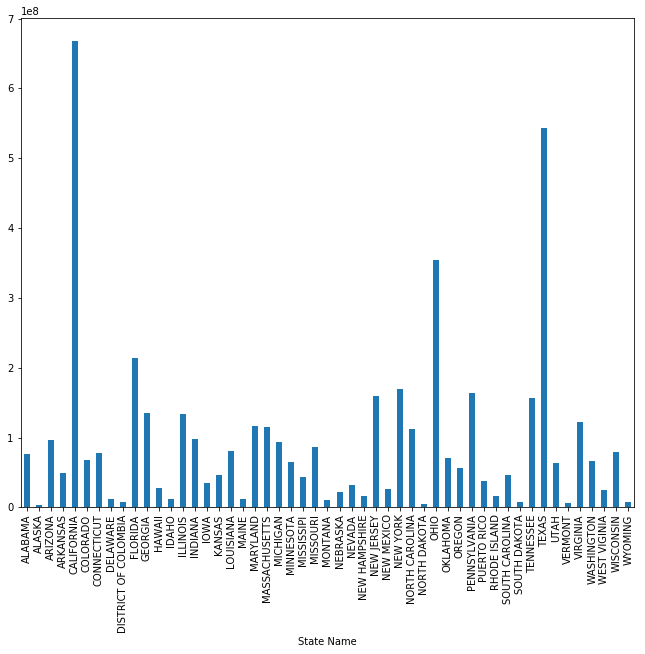

In [18]:
nbi_summary['Sum of ADT'].plot(kind = 'bar', figsize = (11,9))

## Breakdown of Agencies Responsible for the maintenance of U.S. Highway Bridges



In [33]:
pipeline = [{"$match": {"year":2016}},
            {"$project":{"_id":0, "maintenanceReponsibility":1,"deckWidthOutToOut":1, "structureLength":1, "averageDailyTraffic":1 }}]
startTime = time.time()
pdc1 = collection.aggregate(pipeline)
print("Seconds : ", (time.time() - startTime))
nbi_main = pd.DataFrame(list(pdc1))

Seconds :  0.07691693305969238


In [34]:
maintenanceReponsibility ={ -1 : 'NA',
                      1 : 'State Highway Agency',
                      21: 'Other State Agency',
                      4 : 'City or Municipal Highway Agency',
                      80: 'Unknown',
                      66: 'National Park Service',
                      2 : 'County Highway Agency',
                      60: 'Other Federal Agencies (not listest below)',
                      64: 'U.S forest Services' ,
                      68: 'Bureau of Land Management',
                      26: 'Private (other than railroad)',
                      62: 'Bureau of Indian Affairs', 
                      3 : 'Town or Township Highway Agency',
                      25: 'Other Local Agencies',
                      11: 'State Park, Forest or Reservation Agency',
                      63: 'Bureau of Fish and Wildlife',
                      27: 'Railroad',
                      74: 'Army',
                      70: 'Corps of Engineers (Civil)',
                      72: 'Air Force',
                      61: 'Indian Tribal Agency',
                      71: 'Corps of Engineers (Military)',
                      69: 'Bureau of Reclamation',
                      67: 'Tennesssee Valley Authority',
                      32: 'Local Toll Authority',
                      12: 'Local Park, Forest or Reservation Agency',
                      31: 'State Toll Authority',
                      73: 'Navy / Marines',
                      75: 'NASA',
                      76: 'Metropolitian Washington Airports Service'
}
  
nbi_main['Maintenance Reponsibility'] =  nbi_main['maintenanceReponsibility'].map(maintenanceReponsibility)
nbi_main['deckArea']= nbi_main['deckWidthOutToOut'] * nbi_main['structureLength']
nbi_main_maintenance=nbi_main.groupby(['Maintenance Reponsibility']).agg({'Maintenance Reponsibility':'count',
                                'deckArea':'sum',
                                'averageDailyTraffic':'sum'})
mant_valid_bridges = nbi_main_maintenance['Maintenance Reponsibility'].sum()
mant_sum_deck = nbi_main_maintenance['deckArea'].sum()
mant_sum_adt = nbi_main_maintenance['averageDailyTraffic'].sum()
mant_valid_bridges = nbi_main_maintenance['Maintenance Reponsibility'].sum()
mant_sum_deck = nbi_main_maintenance['deckArea'].sum()
mant_sum_adt = nbi_main_maintenance['averageDailyTraffic'].sum()

In [35]:
nbi_main_maintenance['Percent Valid Bridge']= (nbi_main_maintenance['Maintenance Reponsibility']/mant_valid_bridges)*100
nbi_main_maintenance['Percent Deck Area']= (nbi_main_maintenance['deckArea'] / mant_sum_deck)*100
nbi_main_maintenance['Percent ADT']= (nbi_main_maintenance['averageDailyTraffic'] / mant_sum_adt)*100
nbi_main_maintenance['deckArea'] = nbi_main_maintenance['deckArea'].apply(lambda x: '{:.2f}'.format(x))

nbi_main_maintenance = nbi_main_maintenance.rename(columns = {"Maintenance Reponsibilty":"Count",
                                                              "deckArea":"Sum of Deck Area",
                                                               "averageDailyTraffic":"Sum of ADT"})

In [36]:
nbi_main_maintenance

,Maintenance Reponsibility,Sum of Deck Area,Sum of ADT,Percent Valid Bridge,Percent Deck Area,Percent ADT
Maintenance Reponsibility,,,,,,
Air Force,287,121469.57,449042,0.044665,0.031584,0.009352
Army,985,219463.57,711242,0.153292,0.057063,0.014812
Bureau of Fish and Wildlife,304,41538.49,25695,0.047310,0.010801,0.000535
Bureau of Indian Affairs,944,248088.63,552992,0.146911,0.064506,0.011517
Bureau of Land Management,481,79536.58,20686,0.074856,0.020681,0.000431
Bureau of Reclamation,146,40043.25,61985,0.022721,0.010412,0.001291
City or Municipal Highway Agency,46975,26482462.24,310286133,7.310533,6.885786,6.462026
Corps of Engineers (Civil),245,366675.07,428039,0.038128,0.095340,0.008914
County Highway Agency,244552,49576983.27,240400073,38.058659,12.890663,5.006577


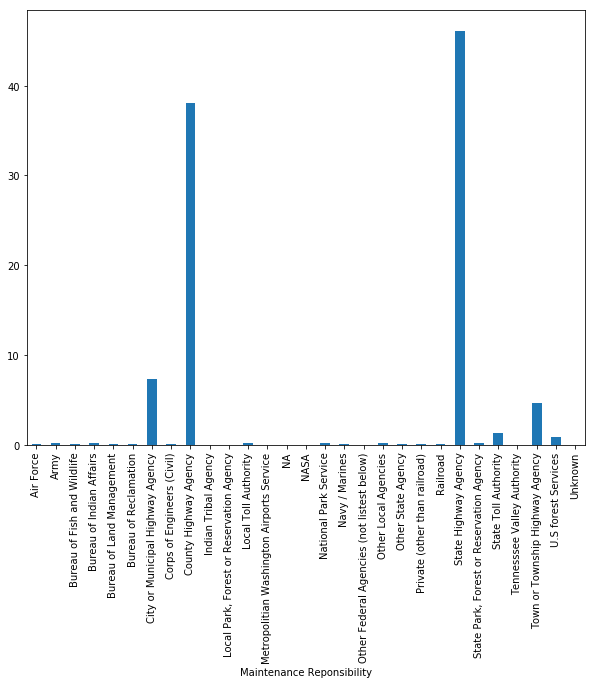

In [22]:
nbi_main_maintenance['Percent Valid Bridge'].plot.bar(figsize = (10,8))

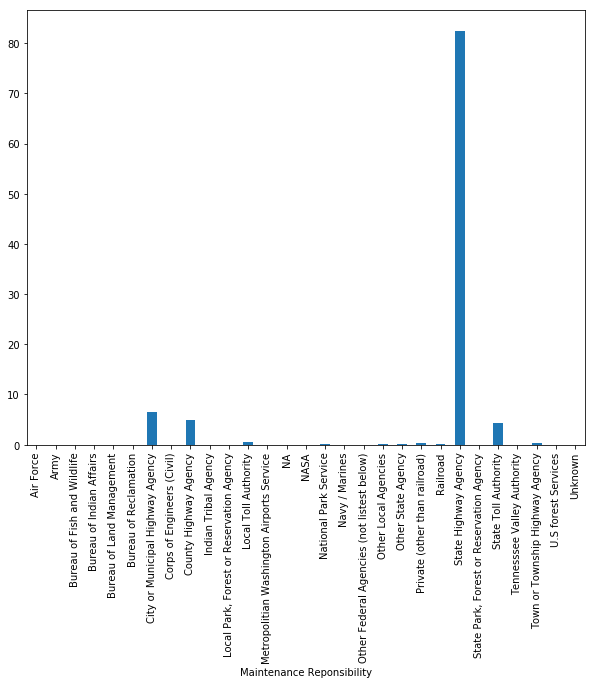

In [23]:
nbi_main_maintenance['Percent ADT'].plot.bar(figsize = (10,8))

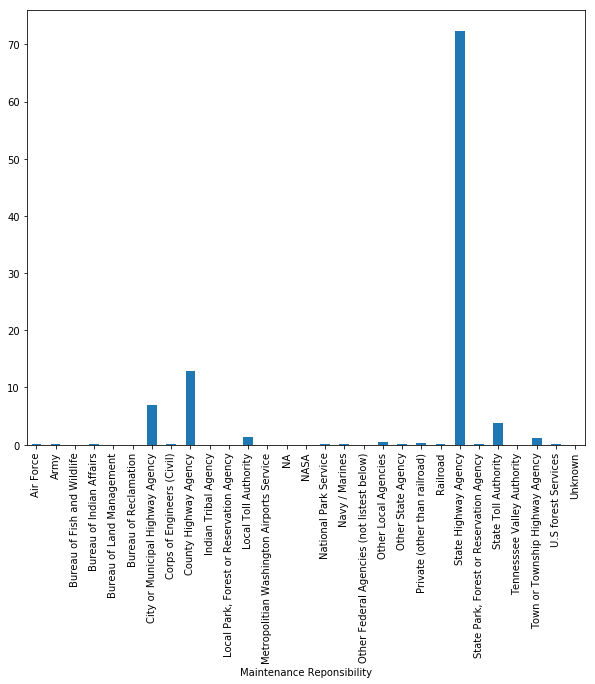

In [24]:
nbi_main_maintenance['Percent Deck Area'].plot.bar(figsize = (10,8))

## Structure Material and Type of Construction

In [25]:
pipelineSM = [{"$match":{"year":2016}},
               {"$group":{"_id":"$structureTypeMain", "count":{"$sum":1}}}]
startTime = time.time()
SM=collection.aggregate(pipelineSM)
print("Seconds: ",(time.time() - startTime))
SM_df = pd.DataFrame(list(SM))
structMat_Type= SM_df.sort_values('count',ascending = 0).head(20)
structMat_Type['kindOfMaterialDesign'] = structMat_Type._id.apply(lambda x: x.get('kindOfMaterialDesign'))
structMat_Type['typeOfDesignConstruction'] = structMat_Type._id.apply(lambda x: x.get('typeOfDesignConstruction'))

Seconds:  2.0784292221069336


In [26]:
Material ={ -1 : 'NA',
                    1 : 'Concrete',
                    2 : 'Concrete Continuous',
                    3 : 'Steel',
                    4 : 'Steel Continuous',
                    5 : 'Prestressed concrete',
                    6 : 'Prestressed concrete continuous',
                    7 : 'Wood or Timber',
                    8 : 'Masonry',
                    9 : 'Aluminium, Wrought, Iron, Cast Iron',
                    0 : 'Other'
}
typeOfDesign  = { -1 : 'NA',
                    1 : 'Slab',
                    2 : 'Stringer / Multi-beam or Girder',
                    3 : 'Gider and Floorbeam System',
                    4 : 'Tee Beam',
                    5 : 'Box Beam or Girder - Multiple',
                    6 : 'Box Beam or Girder - Single or Spread ',
                    7 : 'Frame',
                    8 : 'Orthotropic',
                    9 : 'Truss - Deck',
                   10 : 'Truss - Thru',
                   11 : 'Arch - Deck', 
                   13 : 'Suspension',
                   14 : 'Stayed Girder',
                   15 : 'Movable - Lift',
                   16 : 'Movable - Bascule',
                   17 : 'Movabale - swing',
                   18 : 'Tunnel',
                   19 : 'Culvert',
                   20 : 'Mixed Type',
                   21 : 'Segmental Box Girder',
                   22 : 'Channel Beam',
                   0 : 'Other'
                }
structMat_Type['Material'] = structMat_Type['kindOfMaterialDesign'].map(Material)
structMat_Type['Type of Construction'] = structMat_Type['typeOfDesignConstruction'].map(typeOfDesign)
cols = ['Material','Type of Construction','count']
structMat_Type[cols]


,Material,Type of Construction,count
58,Steel,Stringer / Multi-beam or Girder,102750
54,Concrete,Culvert,93248
73,Prestressed concrete,Stringer / Multi-beam or Girder,57734
52,Steel Continuous,Stringer / Multi-beam or Girder,53597
82,Prestressed concrete,Box Beam or Girder - Multiple,49386
67,Concrete Continuous,Slab,35238
100,Concrete,Slab,33991
106,Concrete Continuous,Culvert,29097
97,Concrete,Tee Beam,20432
47,Prestressed concrete continuous,Stringer / Multi-beam or Girder,17030


In [27]:
cols = ['Material','Type of Construction','count']
structMat_Type[cols]
structMat_Type['Material / Type of Construction'] = structMat_Type['Material'].astype(str)+" - "+structMat_Type['Type of Construction']

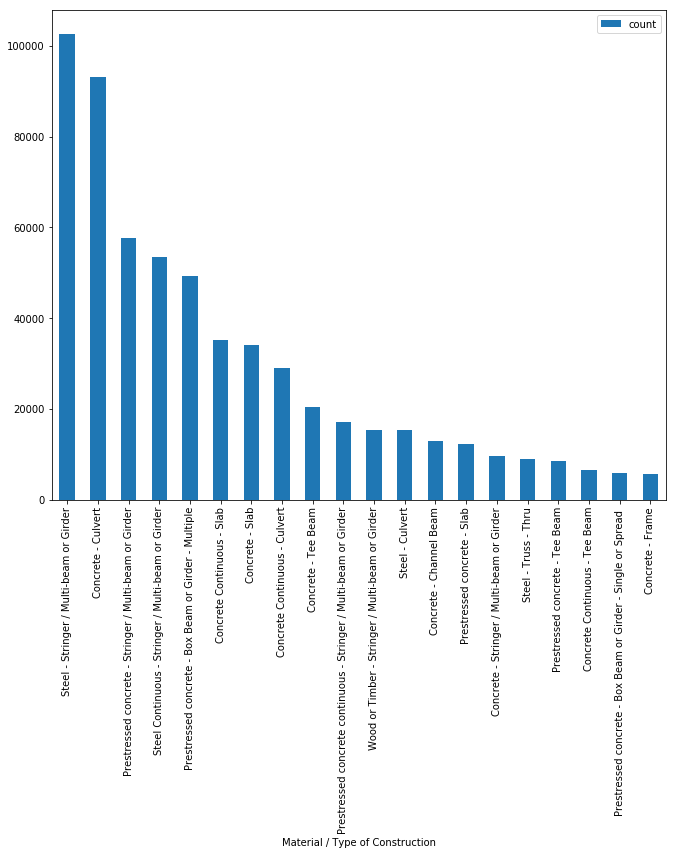

In [28]:
cols = ['Material / Type of Construction', 'count']
structMat_Type = structMat_Type[cols]
structMat_Type = structMat_Type.set_index('Material / Type of Construction')
structMat_Type.plot(kind = 'bar', figsize=(11,9))

## Scour Critical Bridges

In [29]:
pipeline = [{"$match": {"year":2016}},
            {"$project":{"_id":0, "stateCode":1,"scourCriticalBridges":1}}]
startTime = time.time()
scour = collection.aggregate(pipeline)
print("Seconds : ", (time.time() - startTime))
scour_df = pd.DataFrame(list(scour))

Seconds :  0.15120792388916016


In [30]:
scour_df['scourCriticalStatus'] = None
for index, row in scour_df.iterrows():
    if row.scourCriticalBridges in ["0","1","2","3"]:
        scour_df.loc[index, 'scourCriticalStatus'] = "True"
    else:
        scour_df.loc[index, 'scourCriticalStatus'] = "False"

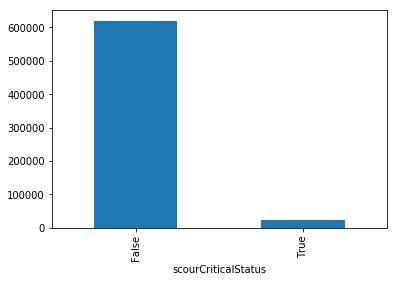

In [37]:
scour_df.groupby(['scourCriticalStatus'])['scourCriticalStatus'].count().plot.bar()